# STOCK PREDICTION USING LSTM

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Tsla.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
1,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
2,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
3,2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400
4,2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700


In [7]:
df.shape

(252, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,206.488651,210.932103,201.862817,206.501150,206.501150,1.367296e+08
std,44.713951,45.092002,44.435965,44.785867,44.785867,3.922100e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,1.091436e+08
50%,198.234993,202.900002,193.480003,197.474998,197.474998,1.283030e+08
75%,249.227505,254.925003,244.457497,250.212505,250.212505,1.610338e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


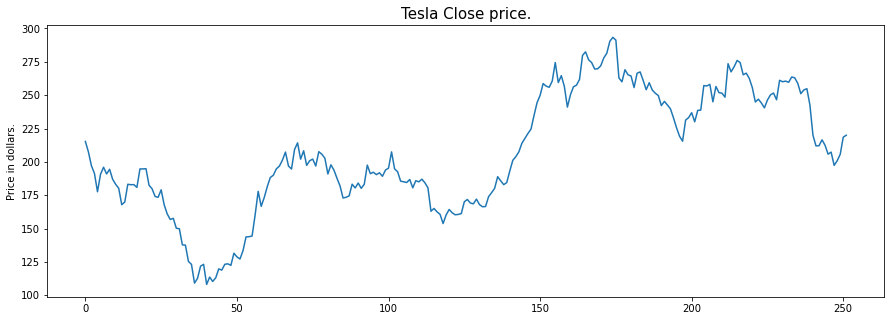

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
1,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
2,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
3,2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400
4,2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700


In [12]:
df[df['Close'] == df['Adj Close']].shape


(252, 7)

In [13]:
df = df.drop(['Adj Close'], axis=1)


In [14]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

D:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

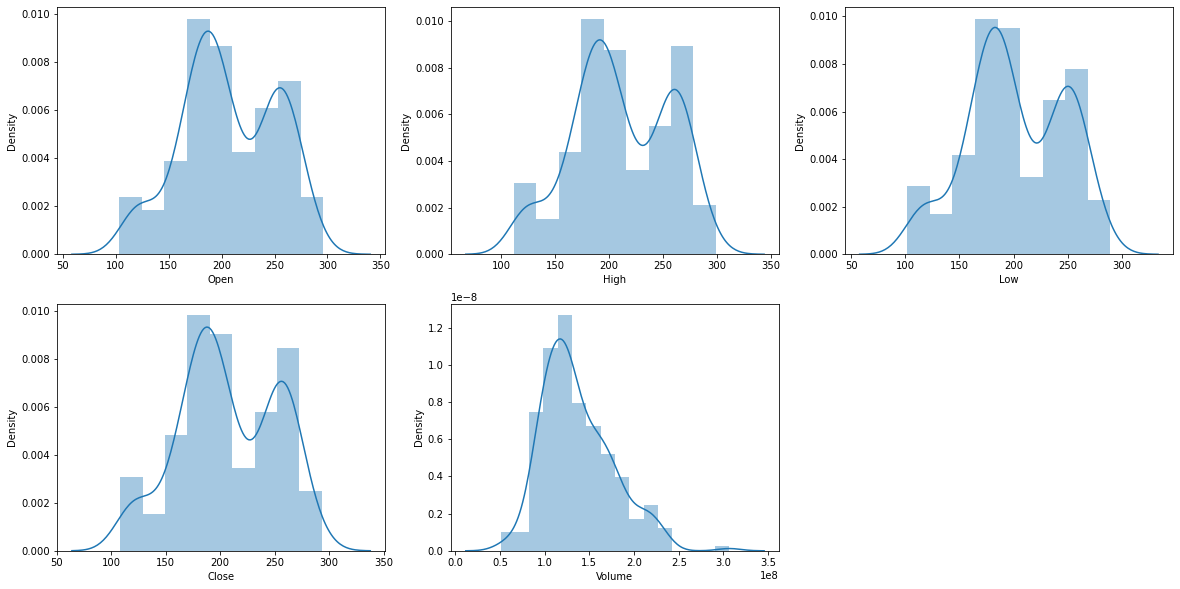

In [20]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\New folder\lib\site-packages\seaborn\_decorators.py:36: Futur

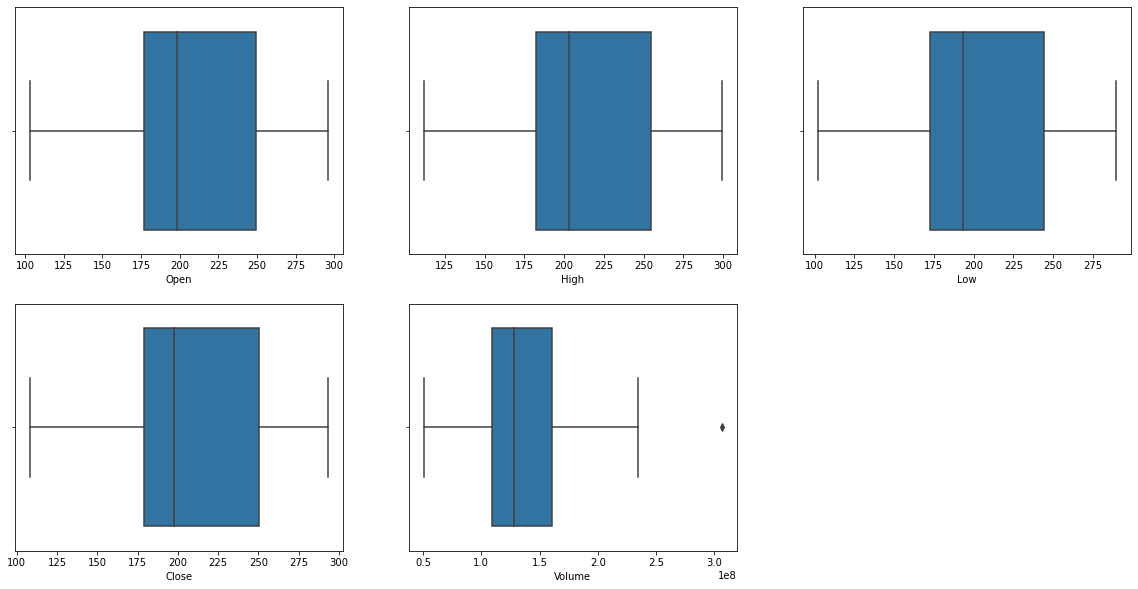

In [21]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [38]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,open-close,low-high,target,day,month,year
0,2022-11-03,211.360001,221.199997,210.139999,215.309998,56538800,-3.949997,-11.059998,0,11,2022,3
1,2022-11-04,222.600006,223.800003,203.080002,207.470001,98622200,15.130005,-20.720001,0,11,2022,4
2,2022-11-07,208.649994,208.899994,196.660004,197.080002,93916500,11.569992,-12.239990,0,11,2022,7
3,2022-11-08,194.020004,195.199997,186.750000,191.300003,128803400,2.720001,-8.449997,0,11,2022,8
4,2022-11-09,190.779999,195.889999,177.119995,177.589996,127062700,13.190003,-18.770004,1,11,2022,9


In [39]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,open-close,low-high,target,day,month,year,is_quarter_end
0,2022-11-03,211.360001,221.199997,210.139999,215.309998,56538800,-3.949997,-11.059998,0,11,2022,3,1
1,2022-11-04,222.600006,223.800003,203.080002,207.470001,98622200,15.130005,-20.720001,0,11,2022,4,1
2,2022-11-07,208.649994,208.899994,196.660004,197.080002,93916500,11.569992,-12.239990,0,11,2022,7,1
3,2022-11-08,194.020004,195.199997,186.750000,191.300003,128803400,2.720001,-8.449997,0,11,2022,8,1
4,2022-11-09,190.779999,195.889999,177.119995,177.589996,127062700,13.190003,-18.770004,1,11,2022,9,1


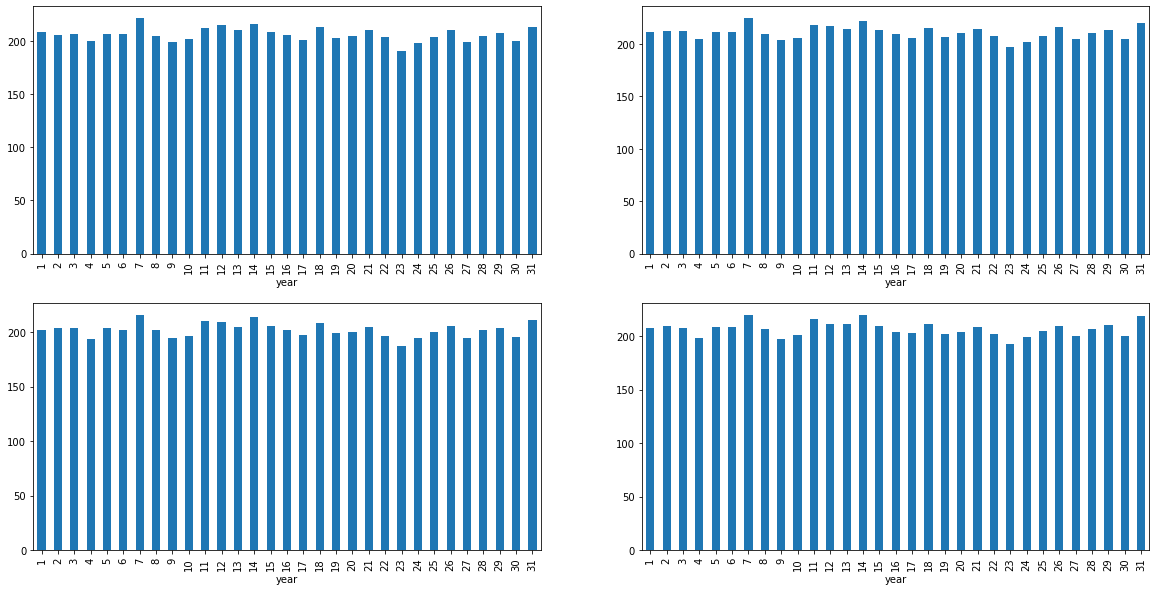

In [40]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [41]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,open-close,low-high,target,day,month,year
is_quarter_end,,,,,,,,,,,
0,213.010991,217.63401,208.645849,213.45533,1.403400e+08,-0.444339,-8.988161,0.542453,5.641509,2023.0,15.716981
1,171.920251,175.41200,165.912750,169.64400,1.175941e+08,2.276251,-9.499249,0.325000,11.525000,2022.0,15.925000


In [32]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

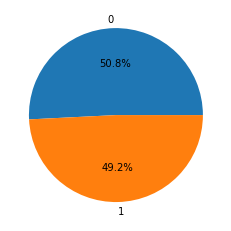

In [33]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

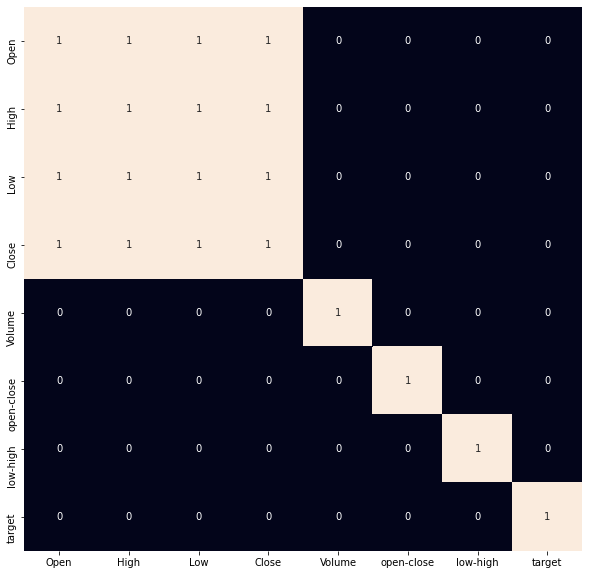

In [34]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [42]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(226, 3) (26, 3)


In [46]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5716302046577276
Validation Accuracy :  0.5151515151515151

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5748843409393868
Validation Accuracy :  0.5454545454545454

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

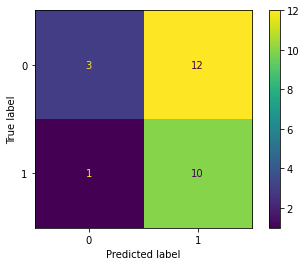

In [47]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()